In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer 
import nltk
import re

from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
#nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
#final kappa value is 0.54

#lasso
Cohen's kappa score of set1: 0.32,ridge = 0.22,lr=0.19
Cohen's kappa score of set2: 0.49,ridge = 0.36,lr = 0.36
Cohen's kappa score of set3: 0.45
Cohen's kappa score of set4: 0.43,ridge = 0.51

Cohen's kappa score of set5: 0.48 ,lr = 0.48
Cohen's kappa score of set6: 0.35 ridge=0.43,lr=0.40
Cohen's kappa score of set7: 0.06 ridge = 0.07,lr = 0.06
Cohen's kappa score of set8: 0.01 ridge = 0.04,lr = 0.04


lasso_list = [0.44, 0.49,0.59,0.60,0.55,0.54,0.37,0.32]

In [132]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/adarsh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
import os

In [256]:
df = pd.read_excel('training_set_rel3.xls')

In [257]:
df.shape

(12978, 28)

In [259]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
import pandas as pd
X = pd.read_excel('training_set_rel3.xls')
y = X['domain1_score']
X = X.dropna(axis=1)
X = X.drop(columns=['rater1_domain1', 'rater2_domain1'])
X.head()

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8


In [3]:
X.shape

(12978, 4)

In [3]:
df1 = df.dropna(axis=1)
df1 = df1.drop(columns=['rater1_domain1', 'rater2_domain1'])
df1.head()

NameError: name 'df' is not defined

In [88]:
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec

#global wl=0

def essay_to_wordlist(essay_v, remove_stopwords):
    """Remove the tagged labels and word tokenize the sentence."""
    essay_v = re.sub("[^a-zA-Z]", " ", essay_v)
    words = essay_v.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    return (words)

def essay_to_sentences(essay_v, remove_stopwords):
    count = 0
    """Sentence tokenize the essay and call essay_to_wordlist() for word tokenization."""
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(essay_v.strip())
    #print('******')
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            #print(raw_sentence)
            w = essay_to_wordlist(raw_sentence, remove_stopwords)
            
            sentences.append(w)
            count+=1
            #print(len(raw_sentence))
            #print(raw_sentence)
    #print('!!!!!!!!!!!!!!!!')
    return (sentences)

def makeFeatureVec(words, model, num_features):
    """Make Feature Vector from the words list of an Essay."""
    featureVec = np.zeros((num_features,),dtype="float32")
    num_words = 0.
    index2word_set = set(model.wv.index2word)
    for word in words:
        if word in index2word_set:
            num_words += 1
            featureVec = np.add(featureVec,model[word])        
    featureVec = np.divide(featureVec,num_words)
    return featureVec

def getAvgFeatureVecs(essays, model, num_features):
    """Main function to generate the word vectors for word2vec model."""
    counter = 0
    essayFeatureVecs = np.zeros((len(essays),num_features),dtype="float32")
    for essay in essays:
        essayFeatureVecs[counter] = makeFeatureVec(essay, model, num_features)
        counter = counter + 1
    return essayFeatureVecs

In [6]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten
from keras.models import Sequential, load_model, model_from_config
import keras.backend as K

def get_model():
    """Define the model."""
    model = Sequential()
    model.add(LSTM(300, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 300], return_sequences=True))
    model.add(LSTM(64, recurrent_dropout=0.4))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    model.summary()

    return model
lstm_model = get_model()
print(lstm_model)

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 300)            721200    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 814,705
Trainable params: 814,705
Non-trainable params: 0
_________________________________________________________________


In [205]:
y

0         8
1         9
2         7
3        10
4         8
         ..
12973    35
12974    32
12975    40
12976    40
12977    40
Name: domain1_score, Length: 12978, dtype: int64

In [10]:
X.iloc[0].essay

"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the econom

In [10]:
X.shape

(12978, 4)

In [7]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import cohen_kappa_score

cv = KFold(n_splits=5, shuffle=True, random_state=len(X))
#print(cv)
results = []
y_pred_list = []
count = 1
for traincv, testcv in cv.split(X):
    print("\n--------Fold {}--------\n".format(count))
    X_test, X_train, y_test, y_train = X.iloc[testcv], X.iloc[traincv], y.iloc[testcv], y.iloc[traincv]
    print('y_train')
    print(y_train.shape)
    train_essays = X_train['essay']
    test_essays = X_test['essay']
    
    sentences = []
    
    for essay in train_essays:
            # Obtaining all sentences from the training essays.
            sentences += essay_to_sentences(essay, remove_stopwords = True)

    
    #print("sentences1 is ", sentences1)  
    #print('*'*100)
    # Initializing variables for word2vec model.
    num_features = 300 
    min_word_count = 40
    num_workers = 4
    context = 10
    downsampling = 1e-3

    print("Training Word2Vec Model...")
    model = Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count, window = context, sample = downsampling)

    model.init_sims(replace=True)
    model.wv.save_word2vec_format('word2vecmodel.bin', binary=True)

    clean_train_essays = []
    
    # Generate training and testing data word vectors.
    for essay_v in train_essays:
        clean_train_essays.append(essay_to_wordlist(essay_v, remove_stopwords=True))
    trainDataVecs = getAvgFeatureVecs(clean_train_essays, model, num_features)
    
    #te = testDataVecs
    #print("te is ", te)
    #print("te shape is ",te.shape)
    
    clean_test_essays = []
    for essay_v in test_essays:
        #print("essay_v is ", essay_v)
        #print('*'*100)
        clean_test_essays.append(essay_to_wordlist( essay_v, remove_stopwords=True ))
    testDataVecs = getAvgFeatureVecs( clean_test_essays, model, num_features )
    
    #te0 = testDataVecs
    #print("te0 is ", te0)
    #print("te0 shape is ",te0.shape)
    trainDataVecs = np.array(trainDataVecs)
    testDataVecs = np.array(testDataVecs)
    
    ##te1 = testDataVecs
    #print("te1 is ", te1)
    #print("te1 shape is ",te1.shape)
    #x0 = testDataVecs.shape
    #y0 = trainDataVecs.shape
    #print("x0 is {} and y0 is {}".format(x0,y0))
    #co = co+1
    # Reshaping train and test vectors to 3 dimensions. (1 represnts one timestep)
    trainDataVecs = np.reshape(trainDataVecs, (trainDataVecs.shape[0], 1, trainDataVecs.shape[1]))
    testDataVecs = np.reshape(testDataVecs, (testDataVecs.shape[0], 1, testDataVecs.shape[1]))
    #x1 = testDataVecs.shape
    #y1 = trainDataVecs.shape
    #print("x1 is {} and y1 is {}".format(x1,y1))
    #te2 = testDataVecs
    #print("te2 is ", te2)
    #print("te2 shape is ",te2.shape)
    print('trainDataVecs')
    print(trainDataVecs.shape)
    print('y_train')
    print(y_train.shape)
    lstm_model = get_model()
    lstm_model.fit(trainDataVecs, y_train, batch_size=64, epochs=50)
   
    y_pred = lstm_model.predict(testDataVecs)
    
    if count == 5:
        print(" done 5 folds !!!! ")
            
    # Round y_pred to the nearest integer.
    y_pred = np.around(y_pred)
    
    #print("y pred is : ", y_pred)
    #print("y pred shape : ",y_pred.shape)
    #print("y test.values : ", y_test.values)
    #print('*'*100)
    #print("y test ", y_test)
    #print('*'*100)
    #print("y test shape : ",y_test.values.shape)
    
    # Evaluate the model on the evaluation metric. "Quadratic mean averaged Kappa"
    result = cohen_kappa_score(y_test.values,y_pred,weights='quadratic')
    
    print("Kappa Score: {}".format(result))
    results.append(result)

    count += 1


--------Fold 1--------

y_train
(10382,)
Training Word2Vec Model...


/home/adarsh/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/home/adarsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


trainDataVecs
(10382, 1, 300)
y_train
(10382,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 300)            721200    
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 814,705
Trainable params: 814,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10382/10382 [==============================] - 4s 353us/step - loss: 66.2998 - mae: 4.4423
Epoch 2/50
10382/10382 [==============================] - 3s 274us/step - loss: 41.4913 - mae: 3.

/home/adarsh/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/home/adarsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


trainDataVecs
(10382, 1, 300)
y_train
(10382,)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 300)            721200    
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 814,705
Trainable params: 814,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10382/10382 [==============================] - 4s 363us/step - loss: 62.9232 - mae: 4.3345
Epoch 2/50
10382/10382 [==============================] - 3s 253us/step - loss: 39.9297 - mae: 3.

/home/adarsh/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/home/adarsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


trainDataVecs
(10382, 1, 300)
y_train
(10382,)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 1, 300)            721200    
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 814,705
Trainable params: 814,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10382/10382 [==============================] - 3s 324us/step - loss: 67.1685 - mae: 4.4834
Epoch 2/50
10382/10382 [==============================] - 2s 210us/step - loss: 42.5863 - mae: 3.

/home/adarsh/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/home/adarsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


trainDataVecs
(10383, 1, 300)
y_train
(10383,)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 1, 300)            721200    
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                93440     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 814,705
Trainable params: 814,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10383/10383 [==============================] - 3s 310us/step - loss: 63.7595 - mae: 4.3515
Epoch 2/50
10383/10383 [==============================] - 2s 203us/step - loss: 40.0061 - mae: 3.

/home/adarsh/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/home/adarsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


trainDataVecs
(10383, 1, 300)
y_train
(10383,)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 1, 300)            721200    
_________________________________________________________________
lstm_12 (LSTM)               (None, 64)                93440     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 814,705
Trainable params: 814,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10383/10383 [==============================] - 3s 243us/step - loss: 64.8668 - mae: 4.4124
Epoch 2/50
10383/10383 [==============================] - 2s 169us/step - loss: 41.0500 - mae: 3.

cumulative Kappa Score is: 0.8226217009930274


In [52]:
X.head()

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8


In [151]:
s4 = []
s4.append('''Education is an important tool which is very useful in everybody’s life. Education is what differentiates us from other living beings on earth. It makes man the smartest creature on earth. It empowers humans and gets them ready to face challenges of life efficiently. With that being said, education still remains a luxury and not a necessity in our country. Educational awareness needs to be spread through the country to make education accessible. But, this remains incomplete without first analyzing the importance of education. Only when the people realize what significance it holds, can they consider it a necessity for a good life. In this essay on Education, we will see the importance of education and how it is a doorway to success.Education is the most significant tool in eliminating poverty and unemployment. Moreover, it enhances the commercial scenario and benefits the country overall. So, the higher the level of education in a country, the better the chances of development are. In addition, this education also benefits an individual in various ways. It helps a person take a better and informed decision with the use of their knowledge. This increases the success rate of a person in life. Subsequently, education is also responsible for providing with an enhanced lifestyle. It gives you career opportunities that can increase your quality of life. Similarly, education also helps in making a person independent. When one is educated enough, they won’t have to depend on anyone else for their livelihood. They will be self-sufficient to earn for themselves and lead a good life. Above all, education also enhances the self-confidence of a person and makes them certain of things in life. When we talk from the countries viewpoint, even then education plays a significant role. Educated people vote for the better candidate of the country. This ensures the development and growth of a nation.''')

In [152]:
s4.append('''Education is, an important tool which is very! useful in everybody’s life. Education is what. differentiates us from other living beings? on earth. It makes man the smartest creature on earth. It empowers humans) and gets them ready to face challenges of life efficiently. "With that being said, education still@ remains a luxury and not a necessity. in our country. Educational awareness needs to be spread through the country/ to; make education accessible. But, this remains incomplete without first analyzing the importance of education. Only when the people realize ;what significance it holds, can they consider it a necessity for a good- life. In this essay on Education, we will see the importance of education and how it is a doorway to success.Education 'is the most significant tool in eliminating poverty and unemployment. Moreover, it enhances the commercial scenario and benefits 'the country overall. So, the higher the level of education in a country, the. better the chances of development are. In addition, this education also? benefits an individual in various ways. It helps a person take a better and informed decision with the use of their knowledge. This increases the success rate of a person in life. Subsequently, education is also responsible for providing with an enhanced lifestyle. It gives you career opportunities that can increase your quality of life. Similarly, education also helps in making a person independent. When one is educated enough, they won’t have to depend on anyone else for their livelihood. They will be self-sufficient to earn for themselves and lead a (good life. Above all, education. also enhances the self-confidence of a person and makes them certain of things in life. When we talk from the countries viewpoint, even then education plays a significant role. Educated people vote for the better candidate of the, country. This ensures the development and. growth of a nation"''')

In [153]:
s4.append('''Education is an impotant tool which is very useful in everbody’s life. Education is what diffrentiates us from other living beings on earth. It makes man the smartest creature on earth. It empowers humans and gets them ready to face chalenges of life eficiently. With that being said, education still remains a luxury and not a necesity in our country. Educational awarenes needs to be spread through the country to make education accesible. But, this remains incomplete without first analyzing the importance of education. Only when the people realize what signficance it holds, can they consider it a necssity for a good life. In this esay on Education, we will see the importance of education and how it is a dorway to success.Education is the most significant tool in eliminating poverty and unemployment. Moreover, it enhances the comercial scenario and benefits the country overall. So, the higher the level of education in a country, the better the chances of development are. In addition, this eduction also beneits an individual in various ways. It helps a person take a better and informed decision with the use of their knowledge. This increases the succes rate of a person in life. Subseqently, education is also responsible for providing with an enhanced lifestyle. It gives you career oportunities that can increase your quality of life. Similarly, education also helps in making a person indpendent. When one is educated enough, they won’t have to depend on anyone else for their livelihod. They will be self-sufficient to earn for themselves and lead a good life. Above all, education also enhances the self-confidnce of a person and makes them certain of thigs in life. When we talk from the coutries viewpoint, even then education plays a significant role. Educted people vote for the better candidate of the country. This ensures the develpment and growth of a nation.''')

In [154]:
s4.append('''Education is  important tool which is the very useful on everybody’s life. Education's is what differentiates us from others living beings on earth. It has makes man the smartest creature on earth. It is empowers humans and gets them ready to the face challenges of life efficiently. With that being said, education still remains a luxury and not an necessity in our country. Educational awareness needs to  spread through the country to make the education accessible. But, this remains incomplete without first analyzing the importance of education. Only when the people realize what significance it holds, can they consider it an necessity for  good life. In this essay on Education, we will see importance of education and how it is a doorway to success.Education is the most significant tool in eliminating poverty and unemployment. Moreover, it enhances the comercial scenario and benefits the country overall. So, the higher the level of education in a country, the better the chances of development are. In addition, this education also benefits an individual in various ways. It helps a person take a better and informed decision with the use of their knowledge. This increases the success rate of a person in life. Subsequently, education is also responsible for providing with an enhanced lifestyle. It gives you career opportunities that can increase your quality of life. Similarly, education also helps in making a person independent. When one is educated enough, they won’t have to depend on anyone else for their livelihood. They will be self-sufficient to earn for themselves and lead a good life. Above all, education also enhances the self-confidence of a person and makes them certain of the thing in life. When we talk from the countries viewpoint, even then education play a significant role. Educated peoples vote for the better candidate of the country. This ensures the development and growth of a nations.''')

In [155]:
s4.append('''Education is a imprtant tool which is very? useful in everybody’s life. Eduction is what differentites" us from other living beigs on earth. It make man the smartest? creature on earth. It is empowers! humanes and gets them ready to face challnges of life efficiently. With this being said, education still remains a luxury and "not a necessity in our country. Educational awarenss needs to  spread through the country to make education accessible. But, this remains incomplete: without first analyzing the importances of a education. Only wheen the people realize what significance it holds, can they consider it necesity for a good life. In this essay on Education, we will see the importance of .education and how it is a doorway to success. Education is the most. significant tool in eliminating poverty and unemployment. Moreover, it enhances the commercial scenairio and benefits the country overall. So, the higher , the level of education in a country, the better? the chances of development are. In addition, this education also a benefits an individual on various ways. It helps a person take a better and informed decision with the use of their knowledge. This increases the success rate of a person in life. Subsequently, education is also responsible for providing with an enhanced lifestyle. It gives you career opportunities that can increase your quality of life. Similarly, education also helps in making a person independent. When one is educated enough, they won’t have to depend on anyone else for their livelihood. They will be self-sufficient to earn for themselves and lead a good life. Above all, education also enhances the self-confidence of a person and makes them certain of things in life. When we talk from the countries viewpoint, even then education plays a significant role. Educated people vote for the better candidate of the country. This ensures the development and growth of a nation.''')

In [188]:
s1

['Now in the society, we are living on a world of machines. We depend on machines for every field of our life. Everything around us are applications of artificial intelligence. Air conditioners, cameras, video games, medical equipment ,were traffic lights, refrigerators, etc work on a “smart” technology . Artificial Intelligence is a branch of computer science that works on to create a computer systems capable to react like a human being. That is to make machines capable of sensing the world around it, to understand conversations and to take decisions as a human would . Computers have more computational power than the human brain Now, computers are millions of times faster than they were fifty years ago. Human brains seem to be far “faster” than computers for a wide variety of tasks. Still, greater computational speed does make some so-called Artificial Intelligent systems seem smarter. Artificial intelligence (AI) have a great role in the field of robotics. Artificial Intelligence in 

In [ ]:
ssay set  1 max score:  12
essay set  2 max score:  6
essay set  3 max score:  3
essay set  4 max score:  3
essay set  5 max score:  4
essay set  6 max score:  4
essay set  7 max score:  24
essay set  8 max score:  60

In [191]:
X

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8
...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,35
12974,21628,8,I never understood the meaning laughter is th...,32
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40
12976,21630,8,Trippin' on fen...,40


In [194]:
X.iloc[2]['essay']

"Dear, @CAPS1 @CAPS2 @CAPS3 More and more people use computers, but not everyone agrees that this benefits society. Those who support advances in technology believe that computers have a positive effect on people. Others have different ideas. A great amount in the world today are using computers, some for work and spme for the fun of it. Computers is one of mans greatest accomplishments. Computers are helpful in so many ways, @CAPS4, news, and live streams. Don't get me wrong way to much people spend time on the computer and they should be out interacting with others but who are we to tell them what to do. When I grow up I want to be a author or a journalist and I know for a fact that both of those jobs involve lots of time on time on the computer, one @MONTH1 spend more time then the other but you know exactly what @CAPS5 getting at. So what if some expert think people are spending to much time on the computer and not exercising, enjoying natures and interacting with family and friend

In [200]:
l = []
for i in range(X.shape[0]):
    if (X.iloc[i]['essay_set'] == 8 and X.iloc[i]['domain1_score']==60):
        l.append(X.iloc[i]['essay'])
        #break
l

[' Bell rings.  Shuffle, shuffle. @CAPS1. Snap. EEEE. Crack. Slam. Click, stomp, @CAPS1. Tap tap tap. SLAM. Creak. Shoof, shoof.  Sigh. Seventh class of the day. Here we go. "@CAPS2! Tu va ou pas? On a +¬tude cette class-l+á. Tu peux aller au bibliotheque si tu veux...." @CAPS3 all blinked at me, @PERSON1, @NUM1le and @ORGANIZATION1, chocolate-haired and mocha skinned, impatiently awaiting my answer. The truth was, I knew @CAPS3 didn\'t really care if I came or not. It made no difference to them if I trailed a few feet behind like some pathetic puppy. I was silent but adorable, loved only because I was an @CAPS4. Because I spoke fidgety @CAPS5. Because I was the exchange student, because my translator and colorful clothes were so shocking for ten seconds, and were then forgotten about.  I was a flock of seagulls haircut. So why are you here? I thought. Why did you go on exchange at all? You are the complete opposite of everyone here. No one wants you. Just go home.  But my ego had a re

In [201]:
len(l)

1

In [203]:
sentences1 = []
test_essay = l
s4score = []
print(len(test_essay))

for essay in test_essay:
# Obtaining all sentences from the training essays.
    print(type(essay))
    #print(essay)
    sentences = essay_to_sentences(essay, remove_stopwords = True)
    print('!!!!!!!!!')
    
    #print("sentences1 is ", sentences1)  
    #print('*'*100)
    # Initializing variables for word2vec model.
    num_features = 300 
    min_word_count = 40
    num_workers = 4
    context = 10
    downsampling = 1e-3


    clean_test_essay = []

        # Generate training and testing data word vectors.
    #for essay_v in test_essay:
    clean_test_essay.append(essay_to_wordlist(essay, remove_stopwords=True))
    testDataVec = getAvgFeatureVecs(clean_test_essay, model, num_features)
    testDataVec = np.array(testDataVec)

        ##te1 = testDataVecs
        #print("te1 is ", te1)
        #print("te1 shape is ",te1.shape)
        #x0 = testDataVecs.shape
        #y0 = trainDataVecs.shape
        #print("x0 is {} and y0 is {}".format(x0,y0))
        #co = c
        # Reshaping train and test vectors to 3 dimensions. (1 represnts one timestep)
    testDataVec = np.reshape(testDataVec, (testDataVec.shape[0], 1, testDataVec.shape[1]))
    my_pred_normal_score = lstm_model.predict(testDataVec)

    # Round my_pred_score to the nearest integer.
    my_pred_normal_score = np.around(my_pred_normal_score)
    print(my_pred_normal_score)
    s4score.append(my_pred_normal_score)

1
<class 'str'>
******
!!!!!!!!!
[[39.]]


/home/adarsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [199]:
s4score

[array([[9.]], dtype=float32),
 array([[9.]], dtype=float32),
 array([[9.]], dtype=float32),
 array([[8.]], dtype=float32),
 array([[11.]], dtype=float32),
 array([[10.]], dtype=float32),
 array([[9.]], dtype=float32),
 array([[13.]], dtype=float32),
 array([[10.]], dtype=float32),
 array([[10.]], dtype=float32),
 array([[11.]], dtype=float32),
 array([[8.]], dtype=float32),
 array([[9.]], dtype=float32),
 array([[10.]], dtype=float32),
 array([[8.]], dtype=float32),
 array([[10.]], dtype=float32),
 array([[10.]], dtype=float32),
 array([[9.]], dtype=float32),
 array([[10.]], dtype=float32),
 array([[10.]], dtype=float32),
 array([[9.]], dtype=float32),
 array([[14.]], dtype=float32),
 array([[11.]], dtype=float32),
 array([[9.]], dtype=float32),
 array([[9.]], dtype=float32),
 array([[11.]], dtype=float32),
 array([[10.]], dtype=float32),
 array([[11.]], dtype=float32),
 array([[10.]], dtype=float32),
 array([[8.]], dtype=float32),
 array([[11.]], dtype=float32),
 array([[9.]], dtype=

In [75]:
l = "Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even about the @DATE1's you'll be surprise at how much he/she knows. Believe it or not the computer is much interesting then in class all day reading out of books. If your child is home on your computer or at a local library, it's better than being out with friends being fresh, or being perpressured to doing something they know isnt right. You might not know where your child is, @CAPS2 forbidde in a hospital bed because of a drive-by. Rather than your child on the computer learning, chatting or just playing games, safe and sound in your home or community place. Now I hope you have reached a point to understand and agree with me, because computers can have great effects on you or child because it gives us time to chat with friends/new people, helps us learn about the globe and believe or not keeps us out of troble. Thank you for listening."
#test_essay = testdf['essay']
j=1
sencount = 0
wordcount = 0
d = {}
prev_i = 0
su = 0
# Obtaining all sentences from the training essays.
d[1] = {}
for i in range(X.shape[0]):
    if(X.iloc[i].essay_set == j):
        sentences, c = essay_to_sentences(X.iloc[i].essay, remove_stopwords = True)
        #print(c)
        #print(le)
        sencount += c
            #print("sentences1 is ", sentences1)  
            #print('*'*100)
            # Initializing variables for word2vec model.
        num_features = 300 
        min_word_count = 40
        num_workers = 4
        context = 10
        downsampling = 1e-3


        clean_test_essay = []

            # Generate training and testing data word vectors.
        #for essay_v in test_essay:
        clean_test_essay.append(essay_to_wordlist(l, remove_stopwords=True))
        #print(len(clean_test_essay[0]))
        wordcount+=len(clean_test_essay[0])
        #testDataVec = getAvgFeatureVecs(clean_test_essay, model, num_features)
        #testDataVec = np.array(testDataVec)
        
            ##te1 = testDataVecs
            #print("te1 is ", te1)
            #print("te1 shape is ",te1.shape)
            #x0 = testDataVecs.shape
            #y0 = trainDataVecs.shape
            #print("x0 is {} and y0 is {}".format(x0,y0))
            #co = c
            # Reshaping train and test vectors to 3 dimensions. (1 represnts one timestep)
        c1 = testDataVec
        #print(testDataVec.shape)
        #print(c1)
        #testDataVec = np.reshape(testDataVec, (testDataVec.shape[0], 1, testDataVec.shape[1]))
        #print(testDataVec.shape)
        #my_pred_score = lstm_model.predict(testDataVec)

        # Round my_pred_score to the nearest integer.
        #my_pred_score = np.around(my_pred_score)
        #print(my_pred_score)
        
    else:
        d[j]['sen'] = sencount
        d[j]['word'] = wordcount
        d[j]['avg word '] = wordcount/(i-prev_i)
        print('no of essay for essay set ',j , 'is', i-prev_i)
        su += i-prev_i
        prev_i = i
        if(j==8):
            sencount = 0
            wordcount = 0
            #prev_i = i
            continue
        if(j<8):
            j+=1
            d[j] = {}
            #print('ola.....................')
            sencount = 0
            wordcount = 0
             #break
d[j]['sen'] = sencount
d[j]['word'] = wordcount
d[j]['avg word '] = wordcount/i-prev_i
print('no of essay for essay set ',j , 'is', i-prev_i)

no of essay for essay set  1 is 1783
no of essay for essay set  2 is 1800
no of essay for essay set  3 is 1726
no of essay for essay set  4 is 1772
no of essay for essay set  5 is 1805
no of essay for essay set  6 is 1800
no of essay for essay set  7 is 1569
no of essay for essay set  8 is 722


In [76]:
d

{1: {'sen': 40615, 'word': 295978, 'avg word ': 166.0},
 2: {'sen': 36631, 'word': 298634, 'avg word ': 165.90777777777777},
 3: {'sen': 10244, 'word': 286350, 'avg word ': 165.90382387022015},
 4: {'sen': 7893, 'word': 293986, 'avg word ': 165.90632054176072},
 5: {'sen': 11980, 'word': 299464, 'avg word ': 165.90803324099724},
 6: {'sen': 14039, 'word': 298634, 'avg word ': 165.90777777777777},
 7: {'sen': 18352, 'word': 260288, 'avg word ': 165.89420012746973},
 8: {'sen': 25171, 'word': 119852, 'avg word ': -12245.764275256222}}

In [74]:
su

12255

In [19]:
--NotebookApp.iopub_data_rate_limit=1.0e10#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

SyntaxError: can't assign to operator (<ipython-input-19-25d083b58976>, line 1)

In [307]:
testdf = pd.read_excel('valid_set.xlsx')

In [309]:
testdf.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,NaN
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,NaN
2,1790,1,"Dear Local newspaper, Have you been spending a...",1790,NaN
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",1791,NaN
4,1792,1,"Dear newspaper, I strongly believe that comput...",1792,NaN


In [344]:
testdf.shape

(4218, 5)

In [271]:
testdf = testdf.drop(['domain2_predictionid'],axis = 1)
testdf.head()

,essay_id,essay_set,essay,domain1_predictionid,actual_predicted_score
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,7
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,8
2,1790,1,"Dear Local newspaper, Have you been spending a...",1790,9
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",1791,9
4,1792,1,"Dear newspaper, I strongly believe that comput...",1792,9


In [310]:
testdf_asap_predict_score = pd.read_csv('valid_sample_submission_5_column.csv')

In [343]:
testdf_asap_predict_score.shape

(4818, 5)

In [312]:
testdf_asap_predict_score.head()

,prediction_id,essay_id,essay_set,essay_weight,predicted_score
0,1788,1788,1,1.0,7
1,1789,1789,1,1.0,8
2,1790,1790,1,1.0,9
3,1791,1791,1,1.0,9
4,1792,1792,1,1.0,9


In [9]:
val = testdf['essay_id']
val1 = testdf_asap_predict_score['essay_id']
actual_pred_score_arr = []
print("val len is", len(val))
for i in val:
    for j in val1:
        if(j==i):
            actual_pred_score = testdf_asap_predict_score['predicted_score'][testdf_asap_predict_score['essay_id']==i].iloc[0]
            actual_pred_score_arr.append(actual_pred_score)
            break
        

NameError: name 'testdf' is not defined

In [345]:
print(len(actual_pred_score_arr))

4218


In [338]:
x = testdf_asap_predict_score['predicted_score'][testdf_asap_predict_score['essay_id']==1790].iloc[0]
#x = x['predicted_score']
lis = []
#lis.append(x)
x

9

In [260]:
#l = testdf_asap_predict_score['predicted_score']

In [346]:
testdf['actual_predicted_score'] = actual_pred_score_arr

In [347]:
testdf.tail()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid,actual_predicted_score
4213,21933,8,Have you ever noticed that if two little kids...,24933,NaN,33
4214,21934,8,Laughter @CAPS1 I ...,24934,NaN,35
4215,21935,8,Laughter in @CAPS1 A laugh is not just an act...,24935,NaN,38
4216,21937,8,LAUGHTER @CAPS1 i was younger my friend live...,24937,NaN,32
4217,21938,8,"You know how the saying goes live, laugh, lov...",24938,NaN,39


In [443]:
testdf = testdf.drop(['domain1_predictionid'], axis=1)
testdf.tail()

,essay_id,essay_set,essay,actual_predicted_score,my_pred_score,actual_normalised_score
4213,21933,8,Have you ever noticed that if two little kids...,33,37.0,4
4214,21934,8,Laughter @CAPS1 I ...,35,38.0,4
4215,21935,8,Laughter in @CAPS1 A laugh is not just an act...,38,35.0,5
4216,21937,8,LAUGHTER @CAPS1 i was younger my friend live...,32,37.0,3
4217,21938,8,"You know how the saying goes live, laugh, lov...",39,35.0,5


In [449]:
sentences1 = []
test_essay = testdf['essay']

for essay in test_essay:
# Obtaining all sentences from the training essays.
    sentences += essay_to_sentences(essay, remove_stopwords = True)

    
    #print("sentences1 is ", sentences1)  
    #print('*'*100)
    # Initializing variables for word2vec model.
num_features = 300 
min_word_count = 40
num_workers = 4
context = 10
downsampling = 1e-3
    
    
clean_test_essay = []
    
    # Generate training and testing data word vectors.
for essay_v in test_essay:
    clean_test_essay.append(essay_to_wordlist(essay_v, remove_stopwords=True))
testDataVec = getAvgFeatureVecs(clean_test_essay, model, num_features)
testDataVec = np.array(testDataVec)
    
    ##te1 = testDataVecs
    #print("te1 is ", te1)
    #print("te1 shape is ",te1.shape)
    #x0 = testDataVecs.shape
    #y0 = trainDataVecs.shape
    #print("x0 is {} and y0 is {}".format(x0,y0))
    #co = c
    # Reshaping train and test vectors to 3 dimensions. (1 represnts one timestep)
testDataVec = np.reshape(testDataVec, (testDataVec.shape[0], 1, testDataVec.shape[1]))
my_pred_normal_score = lstm_model.predict(testDataVec)
            
# Round my_pred_score to the nearest integer.
my_pred_normal_score = np.around(my_pred_normal_score)


/home/adarsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [450]:
testdf['my_pred_normal_score'] = my_pred_normal_score

In [503]:
l = testdf.iloc[4071]
l

essay_id                                                               21753
essay_set                                                                  8
essay                      I was getting a prescripton for my eyes becaus...
actual_predicted_score                                                    21
my_pred_score                                                             34
actual_normalised_score                                                    2
my_pred_normal_score                                                       3
Name: 4071, dtype: object

In [11]:
l = "3423564 453642 421. 56456 34545 23.556 3245.@#$@ #@> @$. 4356 2343"
#test_essay = testdf['essay']

# Obtaining all sentences from the training essays.
sentences += essay_to_sentences(l, remove_stopwords = True)

    
    #print("sentences1 is ", sentences1)  
    #print('*'*100)
    # Initializing variables for word2vec model.
num_features = 300 
min_word_count = 40
num_workers = 4
context = 10
downsampling = 1e-3
    
    
clean_test_essay = []
    
    # Generate training and testing data word vectors.
#for essay_v in test_essay:
clean_test_essay.append(essay_to_wordlist(l, remove_stopwords=True))
testDataVec = getAvgFeatureVecs(clean_test_essay, model, num_features)
testDataVec = np.array(testDataVec)
    
    ##te1 = testDataVecs
    #print("te1 is ", te1)
    #print("te1 shape is ",te1.shape)
    #x0 = testDataVecs.shape
    #y0 = trainDataVecs.shape
    #print("x0 is {} and y0 is {}".format(x0,y0))
    #co = c
    # Reshaping train and test vectors to 3 dimensions. (1 represnts one timestep)
c1 = testDataVec
print(testDataVec.shape)
testDataVec = np.reshape(testDataVec, (testDataVec.shape[0], 1, testDataVec.shape[1]))
print(testDataVec.shape)
my_pred_score = lstm_model.predict(testDataVec)
            
# Round my_pred_score to the nearest integer.
my_pred_score = np.around(my_pred_score)


(1, 300)
(1, 1, 300)


/home/adarsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


In [12]:
len(l)

66

In [539]:
l1 = [i for i in l.split() ]
l1

['3423564',
 '453642',
 '421.',
 '56456',
 '34545',
 '23.556',
 '3245.@#$@',
 '#@>',
 '@$.',
 '4356',
 '2343']

In [540]:
my_pred_score

array([[nan]], dtype=float32)

In [452]:
a = testdf['actual_normalised_score']
m = testdf['my_pred_normal_score']
kappa_Score = cohen_kappa_score(a,m,weights='quadratic')
kappa_Score

0.40431044822771955

In [356]:
l = testdf['actual_predicted_score']
testdf['my_pred_score'] = my_pred_score
m = testdf['my_pred_score']
type(l)

pandas.core.series.Series

In [385]:
testdf.tail()

,essay_id,essay_set,essay,domain1_predictionid,actual_predicted_score,my_pred_score
4213,21933,8,Have you ever noticed that if two little kids...,24933,33,37.0
4214,21934,8,Laughter @CAPS1 I ...,24934,35,38.0
4215,21935,8,Laughter in @CAPS1 A laugh is not just an act...,24935,38,35.0
4216,21937,8,LAUGHTER @CAPS1 i was younger my friend live...,24937,32,37.0
4217,21938,8,"You know how the saying goes live, laugh, lov...",24938,39,35.0


In [396]:
csv_df = pd.DataFrame({'essay_id':testdf['essay_id'], 'essay_set':testdf['essay_set'], 'actual_pred_score':testdf['actual_predicted_score'],'my_pred_score':testdf['my_pred_score']})

In [399]:
csv_df.to_csv('score.csv',index=False)

In [357]:
kappa_Score = cohen_kappa_score(l,m,weights='quadratic')

In [358]:
np.around(kappa_Score,decimals=4)

0.9567

In [295]:
testDataVec.shape

(4218, 1, 300)

In [297]:
my_pred_score.shape

(4218, 1)

In [366]:
x = testdf['essay'][0]
x = x.strip().split()
len(x)

230

In [420]:
print("Average Kappa score after a 5-fold cross validation: ",np.around(np.array(results).mean(),decimals=4))

Average Kappa score after a 5-fold cross validation:  0.5412


In [370]:
l = "Computer addiction can have a variety of negative effects on a person. The most immediate are social. The user withdraws from friends and family as he spends more and more time on the computer. Relationships begin to wither as the user stops attending social gatherings, skips meetings with friends and avoids family members to get more computer time. Even when they do interact with their friends, users may become irritable when away from the computer, causing further social harm.Eventually, excessive computer use can take an emotional toll. The user gradually withdraws into an artificial world. Constant computer gaming can cause someone to place more emotional value on events within the game than things happening in their real lives. Excessive viewing of Internet pornography can warp a person's ideas about sexuality. Someone whose primary friends are screen names in a chat room may have difficulty with face-to-face interpersonal communication.Over the long term, computer addiction can cause physical damage. Using a mouse and keyboard for many hours every day can lead to repetitive stress injuries. Back problems are common among people who spent a lot of time sitting at computer desks. Late-night computer sessions cut into much-needed sleep time. Long-term sleep deprivation causes drowsiness, difficulty concentrating, and depression of the immune system. Someone who spends hours at a computer is obviously not getting any meaningful exercise, so computer addiction can indirectly lead to poor overall physical condition and even obesity.Eventually, the consequences of computer addiction will ripple through the users life. Late-night use or use at work will affect job performance, which could lead to job loss. As the addiction takes its toll on family members, it can even lead to failed marriages.So excessive use of computers is definetly hazardous for health."
#l = l.strip().split()
l

"Computer addiction can have a variety of negative effects on a person. The most immediate are social. The user withdraws from friends and family as he spends more and more time on the computer. Relationships begin to wither as the user stops attending social gatherings, skips meetings with friends and avoids family members to get more computer time. Even when they do interact with their friends, users may become irritable when away from the computer, causing further social harm.Eventually, excessive computer use can take an emotional toll. The user gradually withdraws into an artificial world. Constant computer gaming can cause someone to place more emotional value on events within the game than things happening in their real lives. Excessive viewing of Internet pornography can warp a person's ideas about sexuality. Someone whose primary friends are screen names in a chat room may have difficulty with face-to-face interpersonal communication.Over the long term, computer addiction can 

In [55]:
clean_test_essays.append(essay_to_wordlist( ess, remove_stopwords=True ))
testDatavecs = getAvgFeatureVecs( clean_test_essays, model, num_features )
    
#trainDataVecs = np.array(trainDataVecs)
testDatavecs = np.array(testDatavecs)
# Reshaping train and test vectors to 3 dimensions. (1 represnts one timestep)
#trainDataVecs = np.reshape(trainDataVecs, (trainDataVecs.shape[0], 1, trainDataVecs.shape[1]))
testDatavecs = np.reshape(testDatavecs, (testDatavecs.shape[0], 1, testDatavecs.shape[1]))
testDatavecs.shape

/home/adarsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


(2597, 1, 300)

In [61]:
y = lstm_model.predict(testDatavecs)
print(y)
np.around(y)
print("ola")
print(y)

[[ 7.397272]
 [ 8.289492]
 [10.012595]
 ...
 [23.38621 ]
 [16.85672 ]
 [16.85672 ]]
ola
[[ 7.397272]
 [ 8.289492]
 [10.012595]
 ...
 [23.38621 ]
 [16.85672 ]
 [16.85672 ]]


In [542]:
testdf

,essay_id,essay_set,essay,actual_predicted_score,my_pred_score,actual_normalised_score,my_pred_normal_score
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",7,7.0,3,4.0
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,8,7.0,4,3.0
2,1790,1,"Dear Local newspaper, Have you been spending a...",9,9.0,5,4.0
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",9,7.0,5,4.0
4,1792,1,"Dear newspaper, I strongly believe that comput...",9,9.0,5,4.0
5,1793,1,"Dear local newspaper, @CAPS1 the caveman found...",9,9.0,5,4.0
6,1794,1,"Dear newspaper editor, @CAPS1 now is a letter ...",9,9.0,5,3.0
7,1795,1,"Dear @ORGANIZATION1, @CAPS1, there has been so...",11,10.0,6,5.0
8,1796,1,"Dear Local Newspaper, I would like to complain...",8,7.0,4,4.0
9,1797,1,"Dear Newspaper, @CAPS1 having kids wasting the...",10,11.0,5,4.0


In [556]:
np.around(3.5)

4.0

In [161]:
def essay_to_wordlist(essay):
    """Remove the tagged labels and word tokenize the sentence."""
    essay = re.sub("[^a-zA-Z]", " ", essay)
    lem = WordNetLemmatizer()
    words = essay.lower().split()
    stops = set(stopwords.words("english"))
    print(words)
    words = [lem.lemmatize(w) for w in words if not w in stops]
    print('w*#'*30)
    print(words)
    return (words)

def essay_to_sentences(essay):
    """Sentence tokenize the essay and call essay_to_wordlist() for word tokenization."""
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(essay.strip())
    #print(raw_sentences)
    #print('*'*100)
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(essay_to_wordlist(raw_sentence))
    return sentences


s = []
c = 0
for i in range(2):#df.shape[0]
    review = df["essay"][i]
    c = c+1
    sent = essay_to_sentences(review)
    print(sent)
    #fdist1 = nltk.FreqDist(sent)
    #print(fdist1.most_common(50))
    print('*'*100)
    s.append(sent)

['dear', 'local', 'newspaper', 'i', 'think', 'effects', 'computers', 'have', 'on', 'people', 'are', 'great', 'learning', 'skills', 'affects', 'because', 'they', 'give', 'us', 'time', 'to', 'chat', 'with', 'friends', 'new', 'people', 'helps', 'us', 'learn', 'about', 'the', 'globe', 'astronomy', 'and', 'keeps', 'us', 'out', 'of', 'troble']
w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#
['dear', 'local', 'newspaper', 'think', 'effect', 'computer', 'people', 'great', 'learning', 'skill', 'affect', 'give', 'u', 'time', 'chat', 'friend', 'new', 'people', 'help', 'u', 'learn', 'globe', 'astronomy', 'keep', 'u', 'troble']
['thing', 'about']
w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#
['thing']
['dont', 'you', 'think', 'so']
w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#w*#
['dont', 'think']
['how', 'would', 'you', 'feel', 'if', 'your', 'teenager', 'is', 'always', 

In [365]:
print(s[0])

[['dear', 'local', 'newspaper', 'think', 'effect', 'computer', 'people', 'great', 'learning', 'skill', 'affect', 'give', 'u', 'time', 'chat', 'friend', 'new', 'people', 'help', 'u', 'learn', 'globe', 'astronomy', 'keep', 'u', 'troble'], ['thing'], ['dont', 'think'], ['would', 'feel', 'teenager', 'always', 'phone', 'friend'], ['ever', 'time', 'chat', 'friend', 'buisness', 'partner', 'thing'], ['well', 'new', 'way', 'chat', 'computer', 'plenty', 'site', 'internet', 'organization', 'organization', 'cap', 'facebook', 'myspace', 'ect'], ['think', 'setting', 'meeting', 'bos', 'computer', 'teenager', 'fun', 'phone', 'rushing', 'get', 'cause', 'want', 'use'], ['learn', 'country', 'state', 'outside'], ['well', 'computer', 'internet', 'new', 'way', 'learn', 'going', 'time'], ['might', 'think', 'child', 'spends', 'lot', 'time', 'computer', 'ask', 'question', 'economy', 'sea', 'floor', 'spreading', 'even', 'date', 'surprise', 'much', 'know'], ['believe', 'computer', 'much', 'interesting', 'class',

In [204]:
df1.shape

(12978, 10)

In [125]:
obj = TfidfVectorizer()
corpus = ['This is This This is' ]#, 'another random document.', 'third sample document text']
X = obj.fit_transform(corpus)

In [126]:
print(X)

  (0, 0)	0.5547001962252291
  (0, 1)	0.8320502943378437


In [169]:
df1['essay'][0]

"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the econom

In [186]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

sc = []
wc = []
posc = []
d = dict()
stops = set(stopwords.words("english"))
for i in range(df.shape[0]):
    sent =df1['essay'][i]
    sent2 = sent
    
    sent3 = sent2.split('.')
    
    #sentence count
    sc.append(len(sent3))
    
    #unnecessary characters removal

    sent=sent.lower()
    sent = re.sub("[^a-zA-Z]"," ", sent)
    #print(sent)

    #stop word removal

    
    sent = sent.split(' ')
    
    sent1 = [i for i in sent]
    
    words = [lem.lemmatize(w) for w in sent1 if not w in stops]

    #word count
    wc.append(len(words))

    #print(len(word_tokenize(sent2)))

    #pos tag count
    from collections import Counter
    #sent2 = word_tokenize(sent2)
    words1 = " ".join(words)

    #print(word_tokenize(words1))
    count= Counter([j for i,j in pos_tag(word_tokenize(words1))])
    #print('*'*100)
    #print(count)
    su=0
    for i in count.values():
        su+=i
    posc.append(su)


#sentence count

KeyboardInterrupt: 

In [190]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
sc = []
wc = []
posc = []
d = dict()
stops = set(stopwords.words("english"))
for i in range(df.shape[0]):
    sent =df1['essay'][i]
    
    sent2 = sent
    
    sent3 = sent2.split('.')
    grad = df1['grade'][i]
    #sentence count
    #sc.append(len(sent3))
    sent=sent.lower()
    sent = re.sub("[^a-zA-Z]"," ", sent)
    #print(sent)
    lem = WordNetLemmatizer()
    #stop word removal

    
    sent = sent.split(' ')
    
    sent1 = [i for i in sent]
    
    words = [lem.lemmatize(w) for w in sent1 if not w in stops]

    #word count
    wc.append(len(words))

    #print(len(word_tokenize(sent2)))

    #pos tag count
    from collections import Counter
    #sent2 = word_tokenize(sent2)
    words1 = " ".join(words)

    #print(word_tokenize(words1))
    count= Counter([j for i,j in pos_tag(word_tokenize(words1))])
    #print(count)
    #val+=1
    val = 0
    for i in count.values():
        val+=i
    if(grad in d):
        d[grad] = d[grad] + val
    else:
        d[grad] = 0
        d[grad] = d[grad] + val
        
print(d)

{'B+': 448430, 'A': 373218, 'B': 319585, 'A+': 161621, 'D': 83541, 'C': 7468}


In [181]:
d = {'B+': 55891, 'A': 46195, 'B': 39533, 'A+': 20007, 'D': 12739, 'C': 1052}

In [114]:
d = dict()
x = 912
if(x in d):
    print("found")
else:d[x] = 0
print(d[x])

0


In [226]:
len(sc)

12978

In [228]:
len(posc)

12978

In [229]:
df1['wordCount'] = wc

In [236]:
max(wc)

1057

In [265]:
sc.append(50)

In [266]:
sc.remove(643)

ValueError: list.remove(x): x not in list

In [267]:
df1['senCount'] = sc

In [268]:
df1['posc'] = posc

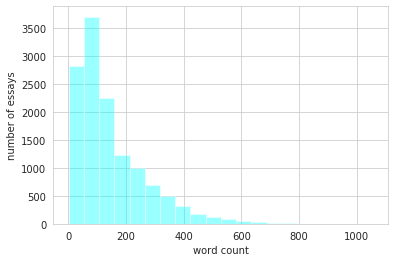

In [328]:
sns.set_style('whitegrid') 
fig = sns.distplot(df1['wordCount'], kde = False, bins = 20,color = 'cyan')



plt.xlabel('word count')
plt.ylabel('number of essays')
#lines = [6,5,4,3,2,1]
#labels = ['A+:6', 'A', 'B+','B','C','D']
#plt.legend(lines, labels)
#plt.legend(labels)
plt.show(fig)


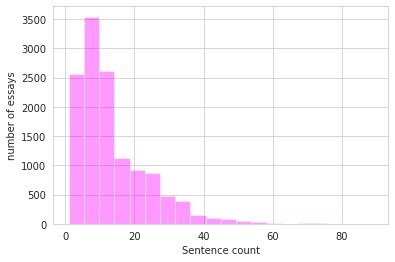

In [324]:
sns.set_style('whitegrid') 
fig = sns.distplot(df1['senCount'], kde = False, bins = 20,color = 'magenta')



plt.xlabel('Sentence count')
plt.ylabel('number of essays')
#lines = [6,5,4,3,2,1]
#labels = ['A+:6', 'A', 'B+','B','C','D']
#plt.legend(lines, labels)
#plt.legend(labels)
plt.show(fig)


In [260]:
sc.remove(643)

In [261]:
max(sc)

89

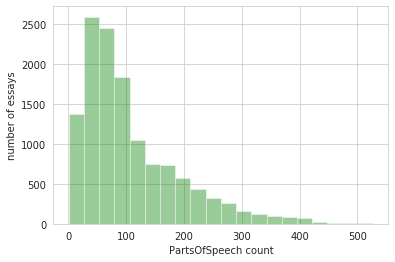

In [280]:
sns.set_style('whitegrid') 
fig = sns.distplot(df1['posc'], kde = False, bins = 20,color = 'green')



plt.xlabel('PartsOfSpeech count')
plt.ylabel('number of essays')
#lines = [6,5,4,3,2,1]
#labels = ['A+:6', 'A', 'B+','B','C','D']
#plt.legend(lines, labels)
#plt.legend(labels)
plt.show(fig)


In [ ]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

sc = []
wc = []
posc = []
stops = set(stopwords.words("english"))
for i in range(df.shape[0]):
    sent =df1['essay'][i]
    sent2 = sent

    sent3 = sent2.split('.')
    
    #sentence count
    sc.append(len(sent3))
    
    #unnecessary characters removal

    sent=sent.lower()
    sent = re.sub("[^a-zA-Z]"," ", sent)
    #print(sent)

    #stop word removal

    
    sent = sent.split(' ')
    
    sent1 = [i for i in sent]
    
    words = [lem.lemmatize(w) for w in sent1 if not w in stops]

    #word count
    wc.append(len(words))

    #print(len(word_tokenize(sent2)))

    #pos tag count
    from collections import Counter
    #sent2 = word_tokenize(sent2)
    words1 = " ".join(words)

    #print(word_tokenize(words1))
    count= Counter([j for i,j in pos_tag(word_tokenize(words1))])
    #print('*'*100)
    #print(count)
    su=0
    for i in count.values():
        su+=i
    posc.append(su)


#sentence count

In [275]:
max(posc)

527

In [276]:
min(posc)

1

In [558]:
for i in range(50,501):
    for j in range(50,501):
        x = 2*(i**2)
        y = j*(j+1)
        if(x==y):
            print("x is {}, n is {}".format(i,j))
            break

x is 204, n is 288


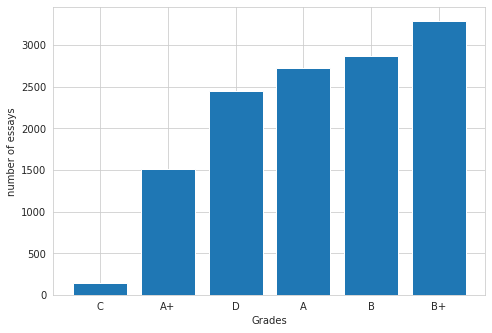

In [246]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'A+', 'D', 'A', 'B','B+']
#students = [23,17,35,29,12]
plt.xlabel('Grades')
plt.ylabel('number of essays')
ax.bar(langs,l1)
plt.show()

([<matplotlib.axis.XTick at 0x7f7f22b5dc50>,
 <a list of 5 Text xticklabel objects>)

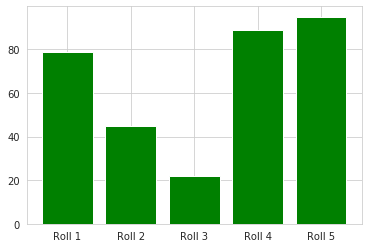

In [291]:
import numpy as np
import matplotlib.pyplot as plt
marks=[79,45,22,89,95]
bars=('Roll 1','Roll 2','Roll 3','Roll 4','Roll 5')
y=np.arange(len(bars))
plt.bar(y,marks,color="green")
plt.xticks(y,bars)

In [293]:
y = np.arange(len(l1))

([<matplotlib.axis.XTick at 0x7f7f1ef768d0>,
 <a list of 6 Text xticklabel objects>)

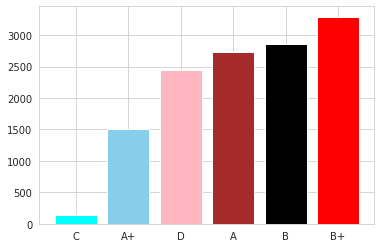

In [303]:
plt.bar(y,l1,color=['cyan','skyblue','lightpink','brown','black','red'])
grades = ['C', 'A+', 'D', 'A', 'B','B+']
plt.xticks(y,grades)

In [169]:
s4score

[array([[9.]], dtype=float32),
 array([[9.]], dtype=float32),
 array([[9.]], dtype=float32),
 array([[9.]], dtype=float32),
 array([[9.]], dtype=float32)]

Text(0, 0.5, 'Score')

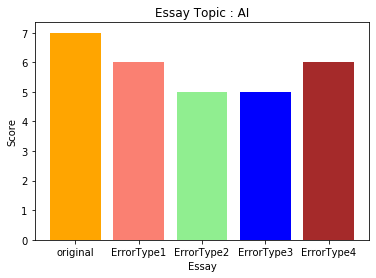

In [184]:
import matplotlib.pyplot as plt
grades = ['original', 'ErrorType1', 'ErrorType2', 'ErrorType3', 'ErrorType4']
l = [7,6,5,5,6]
plt.bar(grades,l,color=['orange','salmon','lightgreen','blue','brown'])
plt.title('Essay Topic : AI')
#plt.xticks(l,grades)
plt.xlabel('Essay')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

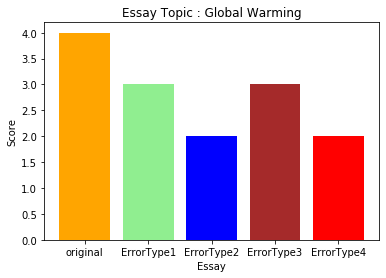

In [183]:
import matplotlib.pyplot as plt
grades = ['original', 'ErrorType1', 'ErrorType2', 'ErrorType3', 'ErrorType4']
l = [4,3,2,3,2]
plt.bar(grades,l,color=['orange','lightgreen','blue','brown','red'])
plt.title('Essay Topic : Global Warming')
#plt.xticks(l,grades)
plt.xlabel('Essay')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

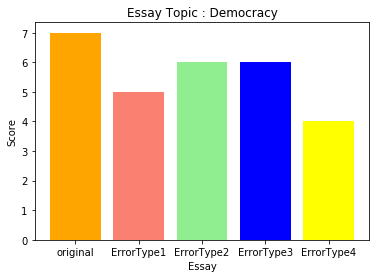

In [181]:
import matplotlib.pyplot as plt
grades = ['original', 'ErrorType1', 'ErrorType2', 'ErrorType3', 'ErrorType4']
l = [7,5,6,6,4]
plt.bar(grades,l,color=['orange','salmon','lightgreen','blue','yellow'])
plt.title('Essay Topic : Democracy')
#plt.xticks(l,grades)
plt.xlabel('Essay')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

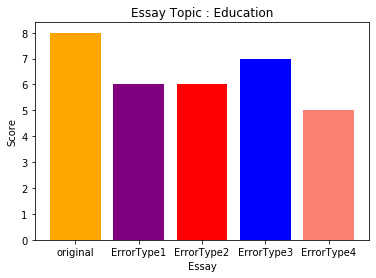

In [187]:
import matplotlib.pyplot as plt
grades = ['original','ErrorType1', 'ErrorType2', 'ErrorType3', 'ErrorType4']
l = [8,6,6,7,5]
plt.bar(grades,l,color=['orange','purple','red','blue','salmon'])
plt.title('Essay Topic : Education')
#plt.xticks(l,grades)
plt.xlabel('Essay')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

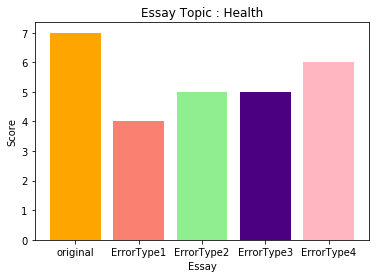

In [179]:
import matplotlib.pyplot as plt
grades = ['original', 'ErrorType1', 'ErrorType2', 'ErrorType3', 'ErrorType4']
l = [7,4,5,5,6]
plt.bar(grades,l,color=['orange','salmon','lightgreen','indigo','lightpink'])
plt.title('Essay Topic : Health')
#plt.xticks(l,grades)
plt.xlabel('Essay')
plt.ylabel('Score')

In [304]:
l

B+    3294
B     2863
A     2729
D     2451
A+    1505
C      136
Name: score4, dtype: int64

In [155]:
df1['grade'].value_counts()

B+    3294
B     2863
A     2729
D     2451
A+    1505
C      136
Name: grade, dtype: int64

In [159]:
#sentence count grade wise
d = dict()
for i in range(df.shape[0]):
    sent =df1['essay'][i]
    
    sent2 = sent
    
    sent3 = sent2.split('.')
    grad = df1['grade'][i]
    #sentence count
    #sc.append(len(sent3))
    if(grad in d):
        d[grad] = d[grad] + len(sent3)
    else:
        d[grad] = 0
        d[grad] = d[grad] + len(sent3)
        
print(d)

{'B+': 55891, 'A': 46195, 'B': 39533, 'A+': 20007, 'D': 12739, 'C': 1052}


In [192]:
l= [1505,2729,3294,2863,136,2451]

In [168]:
sen_count = []
for i,j in d.items():
    if(i=='A+'):
        j = j/l[0]
        d[i] = j
    if(i=='A'):
        j = j/l[1]
        d[i] = j
    if(i=='B+'):
        j = j/l[2]
        d[i] = j
    if(i=='B'):
        j = j/l[3]
        d[i] = j
    if(i=='C'):
        j = j/l[4]
        d[i] = j
    if(i=='D'):
        j = j/l[5]
        d[i] = j
d

{'B+': 16.967516697024895,
 'A': 16.927445950897766,
 'B': 13.808243101641635,
 'A+': 13.293687707641196,
 'D': 5.197470420236638,
 'C': 7.735294117647059}

In [169]:
l = [13.29, 16.92, 16.96, 13.80, 7.73, 5.19]

Text(0, 0.5, 'Avg. sentence count (grade wise)')

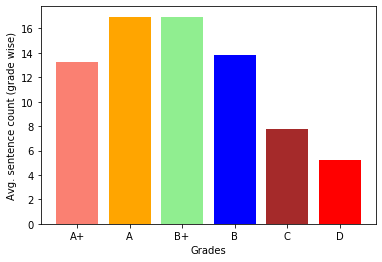

In [180]:
import matplotlib.pyplot as plt
grades = ['A+', 'A', 'B+', 'B', 'C','D']
plt.bar(grades,l,color=['salmon','orange','lightgreen','blue','brown','red'])
#plt.xticks(l,grades)
plt.xlabel('Grades')
plt.ylabel('Avg. sentence count (grade wise)')

In [191]:
d

{'B+': 448430, 'A': 373218, 'B': 319585, 'A+': 161621, 'D': 83541, 'C': 7468}

In [193]:
pos_count = []
for i,j in d.items():
    if(i=='A+'):
        j = j/l[0]
        d[i] = j
    if(i=='A'):
        j = j/l[1]
        d[i] = j
    if(i=='B+'):
        j = j/l[2]
        d[i] = j
    if(i=='B'):
        j = j/l[3]
        d[i] = j
    if(i=='C'):
        j = j/l[4]
        d[i] = j
    if(i=='D'):
        j = j/l[5]
        d[i] = j
d

{'B+': 136.13539769277475,
 'A': 136.75998534261635,
 'B': 111.62591687041565,
 'A+': 107.38936877076412,
 'D': 34.08445532435741,
 'C': 54.911764705882355}

In [195]:
l = [107.38, 136.75, 136.13, 111.62, 54.91,34.08]

Text(0, 0.5, 'Avg. pos count (grade wise)')

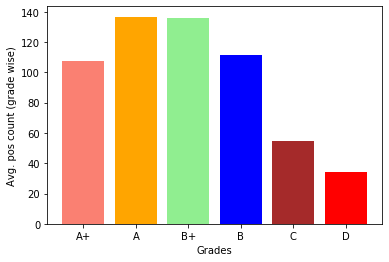

In [196]:
#pos_count grade wise graph
import matplotlib.pyplot as plt
grades = ['A+', 'A', 'B+', 'B', 'C','D']
plt.bar(grades,l,color=['salmon','orange','lightgreen','blue','brown','red'])
#plt.xticks(l,grades)
plt.xlabel('Grades')
plt.ylabel('Avg. pos count (grade wise)')

In [144]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
sent = "This is a foo bar sentence."
pos_tag(word_tokenize(sent))
#[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('foo', 'NN'), ('bar', 'NN'), ('sentence', 'NN'), ('.', '.')]
from collections import Counter
Counter([j for i,j in pos_tag(word_tokenize(sent))])
#Counter({'NN': 3, 'DT': 2, 'VBZ': 1, '.': 1})

Counter({'DT': 2, 'VBZ': 1, 'JJ': 1, 'NN': 2, '.': 1})

In [143]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/adarsh/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [175]:
a = 'this is a foo bar'
x = word_tokenize(a)
print(x)

['this', 'is', 'a', 'foo', 'bar']


POS count, tfidf, word count, sentence count

In [6]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()  
print(ps.stem('candies'))
lem = WordNetLemmatizer()
lem.lemmatize('candies')

candi


'candy'

In [369]:
c = 0
for i in range(df.shape[0]):
    if( df['rater1_domain1'][c] + df['rater2_domain1'][c] == 60):
        print(c)
        print(s[c])
        break
    c = c+1

12342
[['bell', 'ring'], ['shuffle', 'shuffle'], ['cap'], ['snap'], ['eeee'], ['crack'], ['slam'], ['click', 'stomp', 'cap'], ['tap', 'tap', 'tap'], ['slam'], ['creak'], ['shoof', 'shoof'], ['sigh'], ['seventh', 'class', 'day'], ['go'], ['cap'], ['tu', 'va', 'ou', 'pa'], ['tude', 'cette', 'class', 'l'], ['tu', 'peux', 'aller', 'au', 'bibliotheque', 'si', 'tu', 'veux', 'cap', 'blinked', 'person', 'num', 'le', 'organization', 'chocolate', 'haired', 'mocha', 'skinned', 'impatiently', 'awaiting', 'answer'], ['truth', 'knew', 'cap', 'really', 'care', 'came'], ['made', 'difference', 'trailed', 'foot', 'behind', 'like', 'pathetic', 'puppy'], ['silent', 'adorable', 'loved', 'cap'], ['spoke', 'fidgety', 'cap'], ['exchange', 'student', 'translator', 'colorful', 'clothes', 'shocking', 'ten', 'second', 'forgotten'], ['flock', 'seagull', 'haircut'], [], ['thought'], ['go', 'exchange'], ['complete', 'opposite', 'everyone'], ['one', 'want'], ['go', 'home'], ['ego', 'ready', 'answer'], ['begged', 'rem

In [7]:

l = [i for i in range(1,9)]
c = 0
for i in l:
    count=0
    for j in range(c,df.shape[0]):
        if(df['essay_set'][j]==i):
            count+=1
        else:break
    c+=count   
    print("essay set: ",i," count=",count)
    

essay set:  1  count= 1783
essay set:  2  count= 1800
essay set:  3  count= 1726
essay set:  4  count= 1772
essay set:  5  count= 1805
essay set:  6  count= 1800
essay set:  7  count= 1569
essay set:  8  count= 723


In [11]:
df1 = df[['essay_set', 'essay', 'rater1_domain1','rater2_domain1','domain1_score']].copy()

In [78]:
import math
l = [i for i in range(1,9)]
normalised_score = []
c = 0
df = X
for i in l:
    m = 1000
    count = -1
    for j in range(c,df.shape[0]):
        if(df['essay_set'][j]==i):
            count+=1
            if(df['domain1_score'][j]<m): 
                m = df['domain1_score'][j]
        else:break
    print("essay set ", i , "min score: ",m)
    for k in range(c,c+count+1):
        normalised_score.append(df['domain1_score'][k])
        #normalised_score.append(math.ceil((df['domain1_score'][k]/m)*10))
        #normalised_score[k] = (normalised_score[k]/m)*10
    c+=count+1

essay set  1 min score:  2
essay set  2 min score:  1
essay set  3 min score:  0
essay set  4 min score:  0
essay set  5 min score:  0
essay set  6 min score:  0
essay set  7 min score:  2
essay set  8 min score:  10


In [134]:
import math
l = [i for i in range(1,9)]
normalised_score = []
c = 0
for i in l:
    m = -1
    count = -1
    for j in range(c,df.shape[0]):
        if(df['essay_set'][j]==i):
            count+=1
            if(df['domain1_score'][j]>m): 
                m = df['domain1_score'][j]
        else:break
    print("essay set ", i , "max score: ",m)
    for k in range(c,c+count+1):
        normalised_score.append(df['domain1_score'][k])
        #normalised_score.append(math.ceil((df['domain1_score'][k]/m)*10))
        normalised_score[k] = (normalised_score[k]/m)*10
    c+=count+1

essay set  1 max score:  12
essay set  2 max score:  6
essay set  3 max score:  3
essay set  4 max score:  3
essay set  5 max score:  4
essay set  6 max score:  4
essay set  7 max score:  24
essay set  8 max score:  60


In [422]:
import math
l = [i for i in range(1,9)]
actual_normalised_score = []
c = 0
for i in l:
    m = -1
    count = -1
    for j in range(c,testdf.shape[0]):
        if(testdf['essay_set'][j]==i):
            count+=1
            if(testdf['actual_predicted_score'][j]>m): 
                m = testdf['actual_predicted_score'][j]
        else:break
    print("essay set ", i , "max score: ",m)
    for k in range(c,c+count+1):
        actual_normalised_score.append(testdf['actual_predicted_score'][k])
        #normalised_score.append(math.ceil((df['domain1_score'][k]/m)*10))
        actual_normalised_score[k] = (actual_normalised_score[k]/m)*10
    c+=count+1

essay set  1 max score:  12
essay set  2 max score:  5
essay set  3 max score:  3
essay set  4 max score:  3
essay set  5 max score:  4
essay set  6 max score:  4
essay set  7 max score:  24
essay set  8 max score:  50


In [549]:
l = testdf['actual_predicted_score']
l = l[4000:]
npp = np.array(l)
print(np.around(np.mean(npp)))
print(np.std(l))

37.0
4.02694035618483


In [551]:
s = [9, 2, 5, 4, 12, 7, 8, 11, 9, 3, 7, 4, 12, 5, 4, 10, 9, 6, 9, 4 ]
print(np.mean(s))
print(np.std(s))

7.0
2.9832867780352594


In [423]:
testdf['actual_normalised_score']  = actual_normalised_score
testdf.head()

,essay_id,essay_set,essay,domain1_predictionid,actual_predicted_score,my_pred_score,actual_normalised_score
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,7,7.0,5.833333
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,8,7.0,6.666667
2,1790,1,"Dear Local newspaper, Have you been spending a...",1790,9,9.0,7.500000
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",1791,9,7.0,7.500000
4,1792,1,"Dear newspaper, I strongly believe that comput...",1792,9,9.0,7.500000


In [425]:
act = actual_normalised_score
len(act)

4218

In [426]:
normalised_score1 = []
act = actual_normalised_score
for i in range(len(act)):
    try:
        if( (act[i]-int(act[i]))>=0.5 ):
            normalised_score1.append(math.ceil(act[i]))
        else:
            normalised_score1.append(math.floor(act[i]))
            
    except:
        print(i)

In [430]:
testdf['actual_normalised_score1'] = normalised_score1
testdf['actual_normalised_score1'].value_counts()

8     1245
7      846
3      535
5      465
10     449
6      444
9       80
0       79
4       69
2        6
Name: actual_normalised_score1, dtype: int64

In [431]:
testdf.head()

,essay_id,essay_set,essay,domain1_predictionid,actual_predicted_score,my_pred_score,actual_normalised_score,actual_normalised_score1
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,7,7.0,5.833333,6
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,8,7.0,6.666667,7
2,1790,1,"Dear Local newspaper, Have you been spending a...",1790,9,9.0,7.500000,8
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",1791,9,7.0,7.500000,8
4,1792,1,"Dear newspaper, I strongly believe that comput...",1792,9,9.0,7.500000,8


In [432]:
normalised_score2 = []
for i in range(testdf.shape[0]):
    if(testdf['actual_normalised_score1'][i] in [0,1,2,3]):
        normalised_score2.append(1)
    elif(testdf['actual_normalised_score1'][i] in [4,5]):
        normalised_score2.append(2)
    elif(testdf['actual_normalised_score1'][i] in [6]):
        normalised_score2.append(3)
    elif(testdf['actual_normalised_score1'][i] in [7]):
        normalised_score2.append(4)
    elif(testdf['actual_normalised_score1'][i] in [8]):
        normalised_score2.append(5)
    else:normalised_score2.append(6)
        


In [433]:
testdf['actual_normalised_score'] = normalised_score2


In [439]:
testdf = testdf.drop(['actual_normalised_score1'],axis=1)

In [440]:
testdf

,essay_id,essay_set,essay,domain1_predictionid,actual_predicted_score,my_pred_score,actual_normalised_score
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,7,7.0,3
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,8,7.0,4
2,1790,1,"Dear Local newspaper, Have you been spending a...",1790,9,9.0,5
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",1791,9,7.0,5
4,1792,1,"Dear newspaper, I strongly believe that comput...",1792,9,9.0,5
5,1793,1,"Dear local newspaper, @CAPS1 the caveman found...",1793,9,9.0,5
6,1794,1,"Dear newspaper editor, @CAPS1 now is a letter ...",1794,9,9.0,5
7,1795,1,"Dear @ORGANIZATION1, @CAPS1, there has been so...",1795,11,10.0,6
8,1796,1,"Dear Local Newspaper, I would like to complain...",1796,8,7.0,4
9,1797,1,"Dear Newspaper, @CAPS1 having kids wasting the...",1797,10,11.0,5


In [130]:
import math
l = [i for i in range(1,9)]
normalised_score = []
for i in l:
    m = 100
    for j in range(0,df.shape[0]):
        if(df['essay_set'][j]==i):
            if(df['domain1_score'][j]<m): 
                m = df['domain1_score'][j]
    print("essay set ", i , "min score: ",m)

essay set  1 min score:  2
essay set  2 min score:  1
essay set  3 min score:  0
essay set  4 min score:  0
essay set  5 min score:  0
essay set  6 min score:  0
essay set  7 min score:  2
essay set  8 min score:  10


In [123]:
x = df[df['essay_set']==8]
x['domain1_score'].min()

10

In [135]:
len(normalised_score)

12978

In [136]:
normalised_score1 = []
for i in range(len(normalised_score)):
    try:
        if( (normalised_score[i]-int(normalised_score[i]))>=0.5 ):
            normalised_score1.append(math.ceil(normalised_score[i]))
        else:
            normalised_score1.append(math.floor(normalised_score[i]))
            
    except:
        print(i)

In [137]:
df1['normalised_score'] = normalised_score

In [140]:
df1['normalised_score1'] = normalised_score1

In [475]:
df1['normalised_score1'].value_counts()#just ceil func

7     3249
5     2224
8     2172
10    1678
4     1523
6      576
9      573
3      523
0      419
2       40
1        1
Name: normalised_score1, dtype: int64

In [141]:
#trying again after long time diff
df1['normalised_score1'].value_counts()

7     3294
8     2488
5     2296
3     1987
10    1505
6      567
0      419
9      241
4      136
2       43
1        2
Name: normalised_score1, dtype: int64

In [ ]:
#ceil for >0.5
df1['normalised_score1'].value_counts()
#not good

In [480]:
#ceil for >=0.5
df1['normalised_score1'].value_counts()


7     3294
8     2488
5     2296
3     1987
10    1505
6      567
0      419
9      241
4      136
2       43
1        2
Name: normalised_score1, dtype: int64

In [142]:
#normalised score using just ceil
normalised_score2 = []
for i in range(df1.shape[0]):
    if(df1['normalised_score1'][i] in [0,1,2,3]):
        normalised_score2.append(1)
    elif(df1['normalised_score1'][i] in [4]):
        normalised_score2.append(2)
    elif(df1['normalised_score1'][i] in [5,6]):
        normalised_score2.append(3)
    elif(df1['normalised_score1'][i] in [7]):
        normalised_score2.append(4)
    elif(df1['normalised_score1'][i] in [8,9]):
        normalised_score2.append(5)
    else:normalised_score2.append(6)
        


In [62]:
#normalised score using ceil for >=0.5
normalised_score3 = []
for i in range(df1.shape[0]):
    if(df1['normalised_score1'][i] in [0,1,2,3]):
        normalised_score3.append(1)
    elif(df1['normalised_score1'][i] in [4,5,6]):
        normalised_score3.append(2)
    elif(df1['normalised_score1'][i] in [7]):
        normalised_score3.append(3)
    else:normalised_score3.append(4)

In [63]:
df1['normalised_score3'] = normalised_score3

In [143]:
df1['normalised_score2'] = normalised_score2

In [483]:
df1

,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,normalised_score,normalised_score1,normalised_score2,normalised_score3
0,1,"Dear local newspaper, I think effects computer...",4,4,8,6.666667,7,4,3
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9,7.500000,8,5,4
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7,5.833333,6,3,2
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10,8.333333,8,5,4
4,1,"Dear @LOCATION1, I know having computers has a...",4,4,8,6.666667,7,4,3
5,1,"Dear @LOCATION1, I think that computers have a...",4,4,8,6.666667,7,4,3
6,1,Did you know that more and more people these d...,5,5,10,8.333333,8,5,4
7,1,@PERCENT1 of people agree that computers make ...,5,5,10,8.333333,8,5,4
8,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",4,5,9,7.500000,8,5,4
9,1,In the @LOCATION1 we have the technology of a ...,5,4,9,7.500000,8,5,4


In [153]:
df1

,essay_id,essay_set,essay,domain1_score,normalised_score,normalised_score1,normalised_score2,grade
0,1,1,"Dear local newspaper, I think effects computer...",8,6.666667,7,4,B+
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,7.500000,8,5,A
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,5.833333,6,3,B
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,8.333333,8,5,A
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,6.666667,7,4,B+
5,6,1,"Dear @LOCATION1, I think that computers have a...",8,6.666667,7,4,B+
6,7,1,Did you know that more and more people these d...,10,8.333333,8,5,A
7,8,1,@PERCENT1 of people agree that computers make ...,10,8.333333,8,5,A
8,9,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",9,7.500000,8,5,A
9,10,1,In the @LOCATION1 we have the technology of a ...,9,7.500000,8,5,A


In [410]:
X['normalised_score'] = normalised_score2
X

,essay_id,essay_set,essay,domain1_score,normalised_score
0,1,1,"Dear local newspaper, I think effects computer...",8,4
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,5
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,3
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,5
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,4
5,6,1,"Dear @LOCATION1, I think that computers have a...",8,4
6,7,1,Did you know that more and more people these d...,10,5
7,8,1,@PERCENT1 of people agree that computers make ...,10,5
8,9,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",9,5
9,10,1,In the @LOCATION1 we have the technology of a ...,9,5


In [149]:
score = []
for i in range(df1.shape[0]):
    if(df1['normalised_score2'][i]==1):
        score.append('D')
    elif(df1['normalised_score2'][i]==2):
        score.append('C')
    elif(df1['normalised_score2'][i]==3):
        score.append('B')
    elif(df1['normalised_score2'][i]==4):
       score.append('B+')
    elif(df1['normalised_score2'][i]==5):
       score.append('A')
    else:score.append('A+')
        
    

In [154]:
df1['grade'].value_counts()

B+    3294
B     2863
A     2729
D     2451
A+    1505
C      136
Name: grade, dtype: int64

In [150]:
len(score)

12978

In [151]:
df1['grade'] = score

In [69]:
df1['score4'].value_counts()

B+    3294
B     2863
A     2729
D     2451
A+    1505
C      136
Name: score4, dtype: int64

In [65]:
df1['normalised_score2'].value_counts()

4    3294
3    2863
5    2729
1    2451
6    1505
2     136
Name: normalised_score2, dtype: int64

In [25]:
df1['normalised_score3'].value_counts()

4    4234
3    3294
2    2999
1    2451
Name: normalised_score3, dtype: int64

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [297]:
l= df1['score4'].value_counts()
l

B+    3294
B     2863
A     2729
D     2451
A+    1505
C      136
Name: score4, dtype: int64

In [95]:
l1 = sorted(l)

In [100]:
l1

[136, 1505, 2451, 2729, 2863, 3294]

pandas.core.series.Series

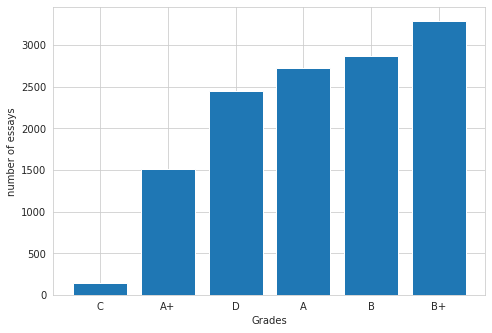

In [104]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'A+', 'D', 'A', 'B','B+']
#students = [23,17,35,29,12]
plt.xlabel('Grades')
plt.ylabel('number of essays')
ax.bar(langs,l1)
plt.show()

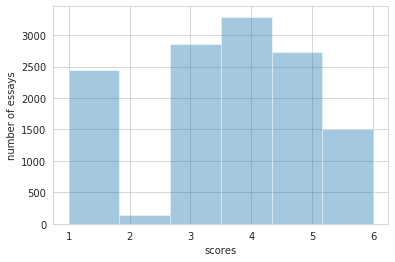

In [78]:
sns.set_style('whitegrid') 
fig = sns.distplot(df1['normalised_score2'], kde = False, bins = 6)
plt.xlabel('scores')
plt.ylabel('number of essays')
#lines = [6,5,4,3,2,1]
#labels = ['A+:6', 'A', 'B+','B','C','D']
#plt.legend(lines, labels)
#plt.legend(labels)
plt.show(fig)


In [105]:
df1['essay'][0]

"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the econom

In [135]:
text1 = df1['essay'][0]

tex1 = re.sub("[^a-zA-Z]", " ", text1)

#print(text1)

stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(text1) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 

#filtered_sentence = re.sub("[^a-zA-Z]", " ", filtered_sentence)
print(filtered_sentence )

#text1 = text1.split(' ')
#
fdist1 = nltk.FreqDist(filtered_sentence)

['Dear', 'local', 'newspaper', ',', 'I', 'think', 'effects', 'computers', 'people', 'great', 'learning', 'skills/affects', 'give', 'us', 'time', 'chat', 'friends/new', 'people', ',', 'helps', 'us', 'learn', 'globe', '(', 'astronomy', ')', 'keeps', 'us', 'troble', '!', 'Thing', '!', 'Dont', 'think', '?', 'How', 'would', 'feel', 'teenager', 'always', 'phone', 'friends', '!', 'Do', 'ever', 'time', 'chat', 'friends', 'buisness', 'partner', 'things', '.', 'Well', '-', "'s", 'new', 'way', 'chat', 'computer', ',', 'plenty', 'sites', 'internet', ':', '@', 'ORGANIZATION1', ',', '@', 'ORGANIZATION2', ',', '@', 'CAPS1', ',', 'facebook', ',', 'myspace', 'ect', '.', 'Just', 'think', 'setting', 'meeting', 'boss', 'computer', ',', 'teenager', 'fun', 'phone', 'rushing', 'get', 'cause', 'want', 'use', '.', 'How', 'learn', 'countrys/states', 'outside', '?', 'Well', 'I', 'computer/internet', ',', "'s", 'new', 'way', 'learn', 'going', 'time', '!', 'You', 'might', 'think', 'child', 'spends', 'lot', 'time',

In [136]:
fdist1

FreqDist({',': 18, '.': 10, 'us': 6, 'computer': 6, 'time': 5, '@': 5, 'child': 5, 'think': 4, 'chat': 4, 'learn': 4, ...})

In [123]:
print (fdist1.most_common(50))

[(',', 18), ('.', 10), ('us', 6), ('computer', 6), ('time', 5), ('@', 5), ('child', 5), ('think', 4), ('chat', 4), ('learn', 4), ('!', 4), ("'s", 4), ('I', 3), ('people', 3), ('friends', 3), ('local', 2), ('effects', 2), ('computers', 2), ('great', 2), ('learning', 2), ('friends/new', 2), ('helps', 2), ('globe', 2), ('keeps', 2), ('troble', 2), ('?', 2), ('How', 2), ('teenager', 2), ('phone', 2), ('Well', 2), ('new', 2), ('way', 2), ('You', 2), ('might', 2), ('much', 2), ('home', 2), ('know', 2), ('Dear', 1), ('newspaper', 1), ('skills/affects', 1), ('give', 1), ('(', 1), ('astronomy', 1), (')', 1), ('Thing', 1), ('Dont', 1), ('would', 1), ('feel', 1), ('always', 1), ('Do', 1)]


In [315]:
#x = flaot('nan')
for i in range(df.shape[0]):
    if(math.isnan(df['domain1_score'][i])):
        print(df[df['essay_id']==i])

      essay_id  essay_set                                              essay  \
4575      6973          3  The setting is described by the author, were v...   

      rater1_domain1  rater2_domain1  rater3_domain1  domain1_score  \
4575             1.0             1.0             NaN            1.0   

      rater1_domain2  rater2_domain2  domain2_score  ...  rater2_trait3  \
4575             NaN             NaN            NaN  ...            NaN   

      rater2_trait4  rater2_trait5  rater2_trait6  rater3_trait1  \
4575            NaN            NaN            NaN            NaN   

      rater3_trait2  rater3_trait3  rater3_trait4  rater3_trait5  \
4575            NaN            NaN            NaN            NaN   

      rater3_trait6  
4575            NaN  

[1 rows x 28 columns]


In [112]:
a = "lorem ipsum por favor is a noe ao"
a = a.split(' ')
print(a)

['lorem', 'ipsum', 'por', 'favor', 'is', 'a', 'noe', 'ao']


In [284]:
l = df['essay_set'].value_counts()

In [285]:
type(l)

pandas.core.series.Series

In [294]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
df['essay_set'].value_counts()

5    1805
6    1800
2    1800
1    1783
4    1772
3    1726
7    1569
8     723
Name: essay_set, dtype: int64

In [319]:
df[df['essay_id']==4575]['domain1_score']

3380    4.0
Name: domain1_score, dtype: float64

In [324]:
df['domain1_score'][12831]

41.0

In [329]:
math.ceil(98.001)

99

oal


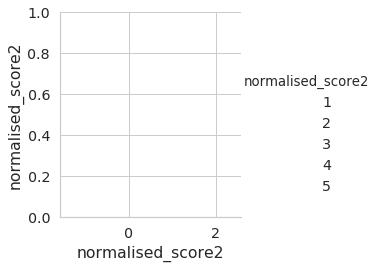

In [428]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.3)
sns.set_style('whitegrid')
x = df1[:-1]
sns.pairplot(x,hue = 'normalised_score2',size = 4,diag_kind = 'kde',height = 1,vars = ['normalised_score2'])
plt.show()

In [423]:
x = df1[:-1]
x

,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,normalised_score,normalised_score1,normalised_score2
0,1,"Dear local newspaper, I think effects computer...",4,4,8,6.666667,7,3
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9,7.500000,8,4
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7,5.833333,6,3
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10,8.333333,9,4
4,1,"Dear @LOCATION1, I know having computers has a...",4,4,8,6.666667,7,3
5,1,"Dear @LOCATION1, I think that computers have a...",4,4,8,6.666667,7,3
6,1,Did you know that more and more people these d...,5,5,10,8.333333,9,4
7,1,@PERCENT1 of people agree that computers make ...,5,5,10,8.333333,9,4
8,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",4,5,9,7.500000,8,4
9,1,In the @LOCATION1 we have the technology of a ...,5,4,9,7.500000,8,4


In [434]:
int(7.5)

7

In [435]:
int(4.9)

4

In [437]:
x = 4.7
if(x-int(x)>=0.5):print('olla')

olla


In [439]:
math.floor(4.1)

4

In [485]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 

text = "Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even about the @DATE1's you'll be surprise at how much he/she knows. Believe it or not the computer is much interesting then in class all day reading out of books. If your child is home on your computer or at a local library, it's better than being out with friends being fresh, or being perpressured to doing something they know isnt right. You might not know where your child is, @CAPS2 forbidde in a hospital bed because of a drive-by. Rather than your child on the computer learning, chatting or just playing games, safe and sound in your home or community place. Now I hope you have reached a point to understand and agree with me, because computers can have great effects on you or child because it gives us time to chat with friends/new people, helps us learn about the globe and believe or not keeps us out of troble. Thank you for listening."


print(sent_tokenize(text)) 

print('*'*100)

print(word_tokenize(text))

['Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble!', 'Thing about!', 'Dont you think so?', 'How would you feel if your teenager is always on the phone with friends!', 'Do you ever time to chat with your friends or buisness partner about things.', "Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect.", 'Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it.', 'How did you learn about other countrys/states outside of yours?', "Well I have by computer/internet, it's a new way to learn about what going on in our time!", "You might think your child spends a lot of time on the computer, but ask them 